## Введение

In [1]:
#Импорт необходимых библиотек 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
#Отключение лишних предупреждений
import warnings
warnings.filterwarnings("ignore")

# 0 - Описание исходного датасета
### Файл - all_v2.csv

В данном датасете представлены данные о изменении реальной стоимости жилья в Российской Федерации за преиод с 2018 года по 2021 год. 
Недавно открытый рынок недвижимости в России имеет недолгую историю. В период советской эпохи всю недвижимость в стране контролировало государство, и граждане имели доступ к жилью только через служебные квартиры, выделяемые по месту работы. Это означало, что возможности для переезда были сильно ограничены. Однако после распада Советского Союза появился рынок недвижимости в России, и жители Москвы впервые получили возможность приватизировать, продавать и покупать собственность. Сегодня рынок недвижимости в России находится в стадии роста. Он предлагает множество интересных возможностей и обещает высокую доходность как для улучшения качества жизни, так и для инвестиций.
Так как рынок недвижимости уже несколько лет находится в стадии роста, это означает, что вы по-прежнему можете найти объекты по очень привлекательным ценам, с возможностью значительного повышения их стоимости в будущем.

Набор данных состоит из списков уникальных объектов популярных порталов по продаже недвижимости в России.
Датасет содержит 540000 объектов недвижимости в России.

In [3]:
#загрузка датасета 
df = pd.read_csv('all_v2.csv', sep = ',', lineterminator='\n')
print(df.shape)
df.head()

(5477006, 13)


,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,20:00:21,59.805808,30.376141,2661,1,8,10,3,82.6,10.8,1
1,8650000,2018-02-27,12:04:54,55.683807,37.297405,81,3,5,24,2,69.1,12.0,1
2,4000000,2018-02-28,15:44:00,56.295250,44.061637,2871,1,5,9,3,66.0,10.0,1
3,1850000,2018-03-01,11:24:52,44.996132,39.074783,2843,4,12,16,2,38.0,5.0,11
4,5450000,2018-03-01,17:42:43,55.918767,37.984642,81,3,13,14,2,60.0,10.0,1


## Часть 1 - Предварительное изучение и обработка данных ##

#### **Описание столбцов** ####

* `date` - дата публикации объявления;
    *   DAY - календарный день выпуска видео в формате YYYY-MM-DD
    *   TIME - время в формате HH:MM:SS
* `time`  - время публикации объявления;
* `geo_lat` - Широта;
* `geo_lon `- Долгота;
* `region` - Регион России. Всего в стране 85 субъектов.;
* `building_type` - тип фасада. 0 - Другое. 1 - Панель. 2 - Монолитный. 3 - Кирпич. 4 - Блочный. 5 - Деревянный;
*` object_type` - Тип квартиры. 1 - Вторичный рынок недвижимости; 2 - Новостройка;
* `level` - Этаж квартиры;
* `levels `- Этажность;
* `rooms `- количество жилых комнат. Если значение "-1", то это означает "квартира-студия";
* `area`- общая площадь квартиры;
* `kitchen_area` - площадь кухни;
* `price` - Стоимость в рублях.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5477006 entries, 0 to 5477005
Data columns (total 13 columns):
 #   Column         Dtype  
---  ------         -----  
 0   price          int64  
 1   date           object 
 2   time           object 
 3   geo_lat        float64
 4   geo_lon        float64
 5   region         int64  
 6   building_type  int64  
 7   level          int64  
 8   levels         int64  
 9   rooms          int64  
 10  area           float64
 11  kitchen_area   float64
 12  object_type    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 543.2+ MB


In [5]:
df.describe()

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
count,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06
mean,4.422029e+06,5.403826e+01,5.324433e+01,4.307141e+03,1.948966e+00,6.214530e+00,1.139892e+01,1.726173e+00,5.391825e+01,1.062840e+01,3.945399e+00
std,2.150752e+07,4.622758e+00,2.074763e+01,3.308050e+03,1.038537e+00,4.957419e+00,6.535734e+00,1.082133e+00,3.335293e+01,9.792380e+00,4.558357e+00
min,-2.144967e+09,4.145906e+01,1.989020e+01,3.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-2.000000e+00,7.000000e-02,1.000000e-02,1.000000e+00
25%,1.950000e+06,5.337768e+01,3.777790e+01,2.661000e+03,1.000000e+00,2.000000e+00,5.000000e+00,1.000000e+00,3.800000e+01,7.000000e+00,1.000000e+00
50%,2.990000e+06,5.517139e+01,4.306774e+01,2.922000e+03,2.000000e+00,5.000000e+00,1.000000e+01,2.000000e+00,4.802000e+01,9.700000e+00,1.000000e+00
75%,4.802000e+06,5.622613e+01,6.564895e+01,6.171000e+03,3.000000e+00,9.000000e+00,1.600000e+01,2.000000e+00,6.313000e+01,1.270000e+01,1.100000e+01
max,2.147484e+09,7.198040e+01,1.625361e+02,6.188800e+04,5.000000e+00,3.900000e+01,3.900000e+01,1.000000e+01,7.856000e+03,9.999000e+03,1.100000e+01


In [6]:
df_types = df.dtypes
print("Типы данных:")
print(df_types)

Типы данных:
price              int64
date              object
time              object
geo_lat          float64
geo_lon          float64
region             int64
building_type      int64
level              int64
levels             int64
rooms              int64
area             float64
kitchen_area     float64
object_type        int64
dtype: object


In [7]:
print(df.isnull().sum())

price            0
date             0
time             0
geo_lat          0
geo_lon          0
region           0
building_type    0
level            0
levels           0
rooms            0
area             0
kitchen_area     0
object_type      0
dtype: int64


In [8]:
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns
categorical_vars = df.select_dtypes(include=['object']).columns
print("Числовые переменные:")
print(numerical_vars)
print("Категориальные переменные:")
print(categorical_vars)

Числовые переменные:
Index(['price', 'geo_lat', 'geo_lon', 'region', 'building_type', 'level',
       'levels', 'rooms', 'area', 'kitchen_area', 'object_type'],
      dtype='object')
Категориальные переменные:
Index(['date', 'time'], dtype='object')


In [9]:
# Преобразование категориальных переменных в числовые 
df_encoded = pd.get_dummies(df, columns=['building_type', 'object_type'])

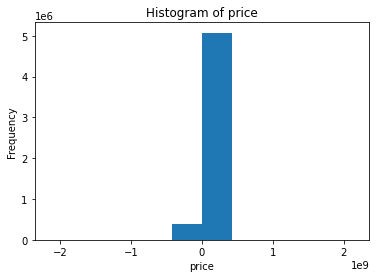

In [10]:
#Визуализация данных:
#Гистограмма
plt.hist(df['price'])
plt.xlabel('price')
plt.ylabel('Frequency')
plt.title('Histogram of price')
plt.show()

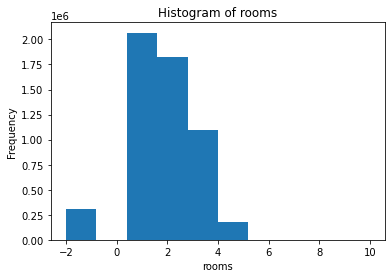

In [11]:
plt.hist(df['rooms'])
plt.xlabel('rooms')
plt.ylabel('Frequency')
plt.title('Histogram of rooms')
plt.show()

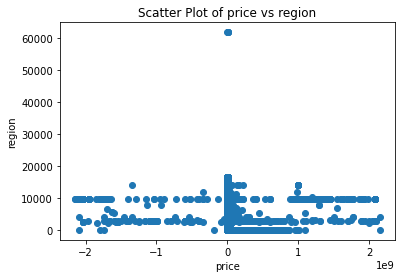

In [12]:
#Диаграмма рассеяния
plt.scatter(df['price'], df['region'])
plt.xlabel('price')
plt.ylabel('region')
plt.title('Scatter Plot of price vs region')
plt.show()

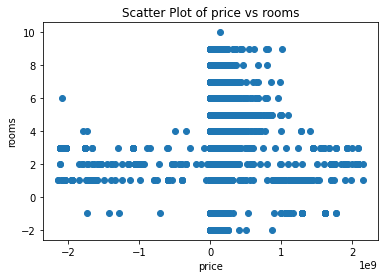

In [13]:
plt.scatter(df['price'], df['rooms'])
plt.xlabel('price')
plt.ylabel('rooms')
plt.title('Scatter Plot of price vs rooms')
plt.show()

### Часть 2 - Очистка данных ###

##### Исследование столбца `price` #####

##### Методология удаления выбросов зависит от типа распределения данных в столбце. В этом случае  я рассматриваю данный вариант:
> Если в распределении заметны отклонения в правую или левую сторону - используем метод Межквартильного расстояния (IQR):

$$ IQR = \text{75% quantile} - \text{25% quantile} $$

$$ [\text{first quartile} - 3 \cdot \text{IQR}; \text{third quartile} + 3 \cdot \text{IQR}]
 $$


In [14]:
# Вычисление среднего значения признака price 
mean_price = df['price'].mean()
print(mean_price)

4422029.022870342


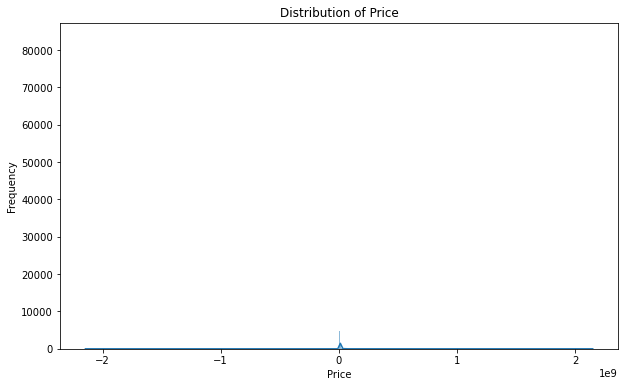

In [15]:
# Визуализация гистограммы и графика плотности
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.show()

In [16]:
# Вычисление статистических метрик для столбца "price"
Q1 = df['price'].quantile(0.25)  # Нижний квартиль (25% квантиль)
Q3 = df['price'].quantile(0.75)  # Верхний квартиль (75% квантиль)
IQR = Q3 - Q1  # Межквартильный размах

In [17]:
# Определение границ для определения выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [18]:
# Фильтрация выбросов
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

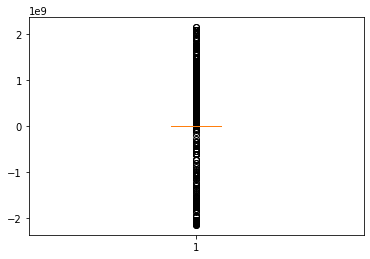

In [19]:
# Визуализация выбросов, посредством построения "ящика с усами"
plt.boxplot(df['price'])
plt.show()

In [20]:
df_filtered = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
print(f"Количество удаленных выбросов: {len(outliers)}")

Количество удаленных выбросов: 432888


In [21]:
# Вывод выбросов
print(outliers)

            price        date      time    geo_lat    geo_lon  region  \
29       11500000  2018-04-03  17:40:53  55.798921  37.738090       3   
34       10200000  2018-04-07  15:23:20  55.655307  37.614605       3   
44       11500000  2018-04-18  21:52:41  55.701330  37.507412       3   
56       20900000  2018-05-01  13:33:09  55.730785  37.631424       3   
59       12000000  2018-05-12  21:08:19  55.627136  37.591736       3   
...           ...         ...       ...        ...        ...     ...   
5476999  12850000  2021-05-01  20:13:47  55.701280  37.642654       3   
5477001  19739760  2021-05-01  20:13:58  55.804736  37.750898       3   
5477002  12503160  2021-05-01  20:14:01  55.841415  37.489624       3   
5477004  11831910  2021-05-01  20:14:12  55.804736  37.750898       3   
5477005  13316200  2021-05-01  20:14:15  55.860240  37.540356       3   

         building_type  level  levels  rooms  area  kitchen_area  object_type  
29                   1     14      16      

##### Исследование столбца `rooms` #####

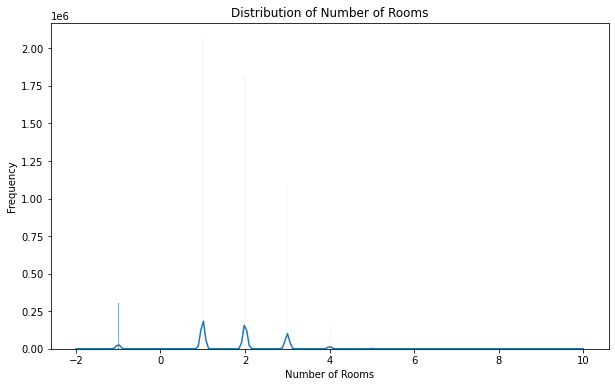

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(df['rooms'], kde=True)
plt.xlabel('Number of Rooms')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Rooms')
plt.show()

Судя по графику выше, можно сказать, что достаточно хорошо видны отклонения в левую сторону. Поэтому используем метод межквартильного расстояния

In [23]:
# Вычисление статистических метрик для столбца "price"
Q1 = df['rooms'].quantile(0.25)  # Нижний квартиль (25% квантиль)
Q3 = df['rooms'].quantile(0.75)  # Верхний квартиль (75% квантиль)
IQR = Q3 - Q1  # Межквартильный размах

In [24]:
# Определение границ для определения выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [25]:
# Фильтрация выбросов
outliers = df[(df['rooms'] < lower_bound) | (df['rooms'] > upper_bound)]

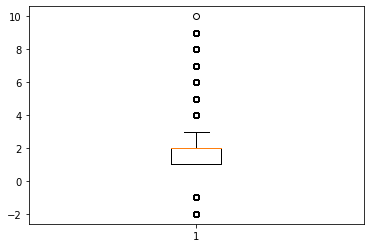

In [26]:
# Визуализация выбросов, посредством построения "ящика с усами"
plt.boxplot(df['rooms'])
plt.show()

In [27]:
filtered_data = df[(df['rooms'] >= lower_bound) & (df['rooms'] <= upper_bound)]

##### Исследование столбца `object_type` #####

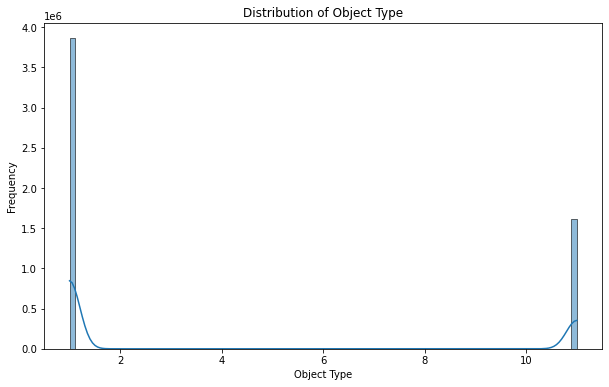

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(df['object_type'], kde=True)
plt.xlabel('Object Type')
plt.ylabel('Frequency')
plt.title('Distribution of Object Type')
plt.show()

В данном случае перекошено больше в левую сторону, используем метод межквартильного расстояния

In [29]:
# Вычисление статистических метрик для столбца "price"
Q1 = df['object_type'].quantile(0.25)  # Нижний квартиль (25% квантиль)
Q3 = df['object_type'].quantile(0.75)  # Верхний квартиль (75% квантиль)
IQR = Q3 - Q1  # Межквартильный размах

In [30]:
# Определение границ для определения выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [31]:
# Фильтрация выбросов
outliers = df[(df['object_type'] < lower_bound) | (df['object_type'] > upper_bound)]

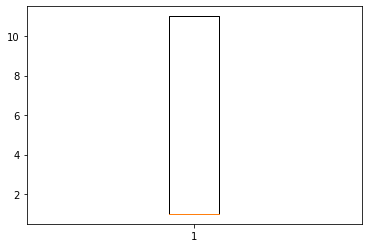

In [32]:
# Визуализация выбросов, посредством построения "ящика с усами"
plt.boxplot(df['object_type'])
plt.show()

### Часть 3 - Поиск и анализ взаимосвязей ###

#### Этап 1 - Базовый корреляционный анализ ####

Путем анализа корреляционной матрицы можно определить, насколько сильно и в каком направлении взаимосвязь между переменными. Коэффициент корреляции принимает значения от -1 до 1, где -1 указывает на полную обратную линейную связь, 1 - на полную прямую линейную связь, а значение близкое к 0 говорит об отсутствии линейной связи.

In [33]:
df.corr()

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
price,1.000000,0.037456,-0.062832,-0.072897,0.007291,0.040225,0.052906,0.073896,0.121303,0.061908,0.006498
geo_lat,0.037456,1.000000,0.115666,0.022726,-0.116943,0.043704,0.081417,0.012143,0.001010,-0.013474,0.125130
geo_lon,-0.062832,0.115666,1.000000,0.763441,-0.193450,-0.103352,-0.145826,-0.070206,-0.028194,-0.079730,0.068982
region,-0.072897,0.022726,0.763441,1.000000,-0.166435,-0.118545,-0.165060,-0.090807,-0.010468,-0.057210,0.113064
building_type,0.007291,-0.116943,-0.193450,-0.166435,1.000000,-0.114470,-0.188201,0.058950,0.018955,0.014443,-0.171697
level,0.040225,0.043704,-0.103352,-0.118545,-0.114470,1.000000,0.660736,-0.043867,0.051827,0.107566,0.241984
levels,0.052906,0.081417,-0.145826,-0.165060,-0.188201,0.660736,1.000000,-0.101464,0.051191,0.147516,0.379506
rooms,0.073896,0.012143,-0.070206,-0.090807,0.058950,-0.043867,-0.101464,1.000000,0.502173,0.155199,-0.139579
area,0.121303,0.001010,-0.028194,-0.010468,0.018955,0.051827,0.051191,0.502173,1.000000,0.270627,0.007504
kitchen_area,0.061908,-0.013474,-0.079730,-0.057210,0.014443,0.107566,0.147516,0.155199,0.270627,1.000000,0.098302


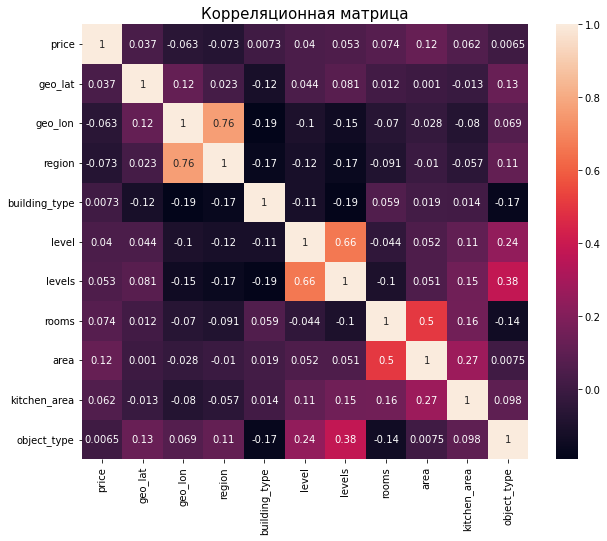

In [34]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)
plt.title("Корреляционная матрица", fontsize=15)
plt.show()

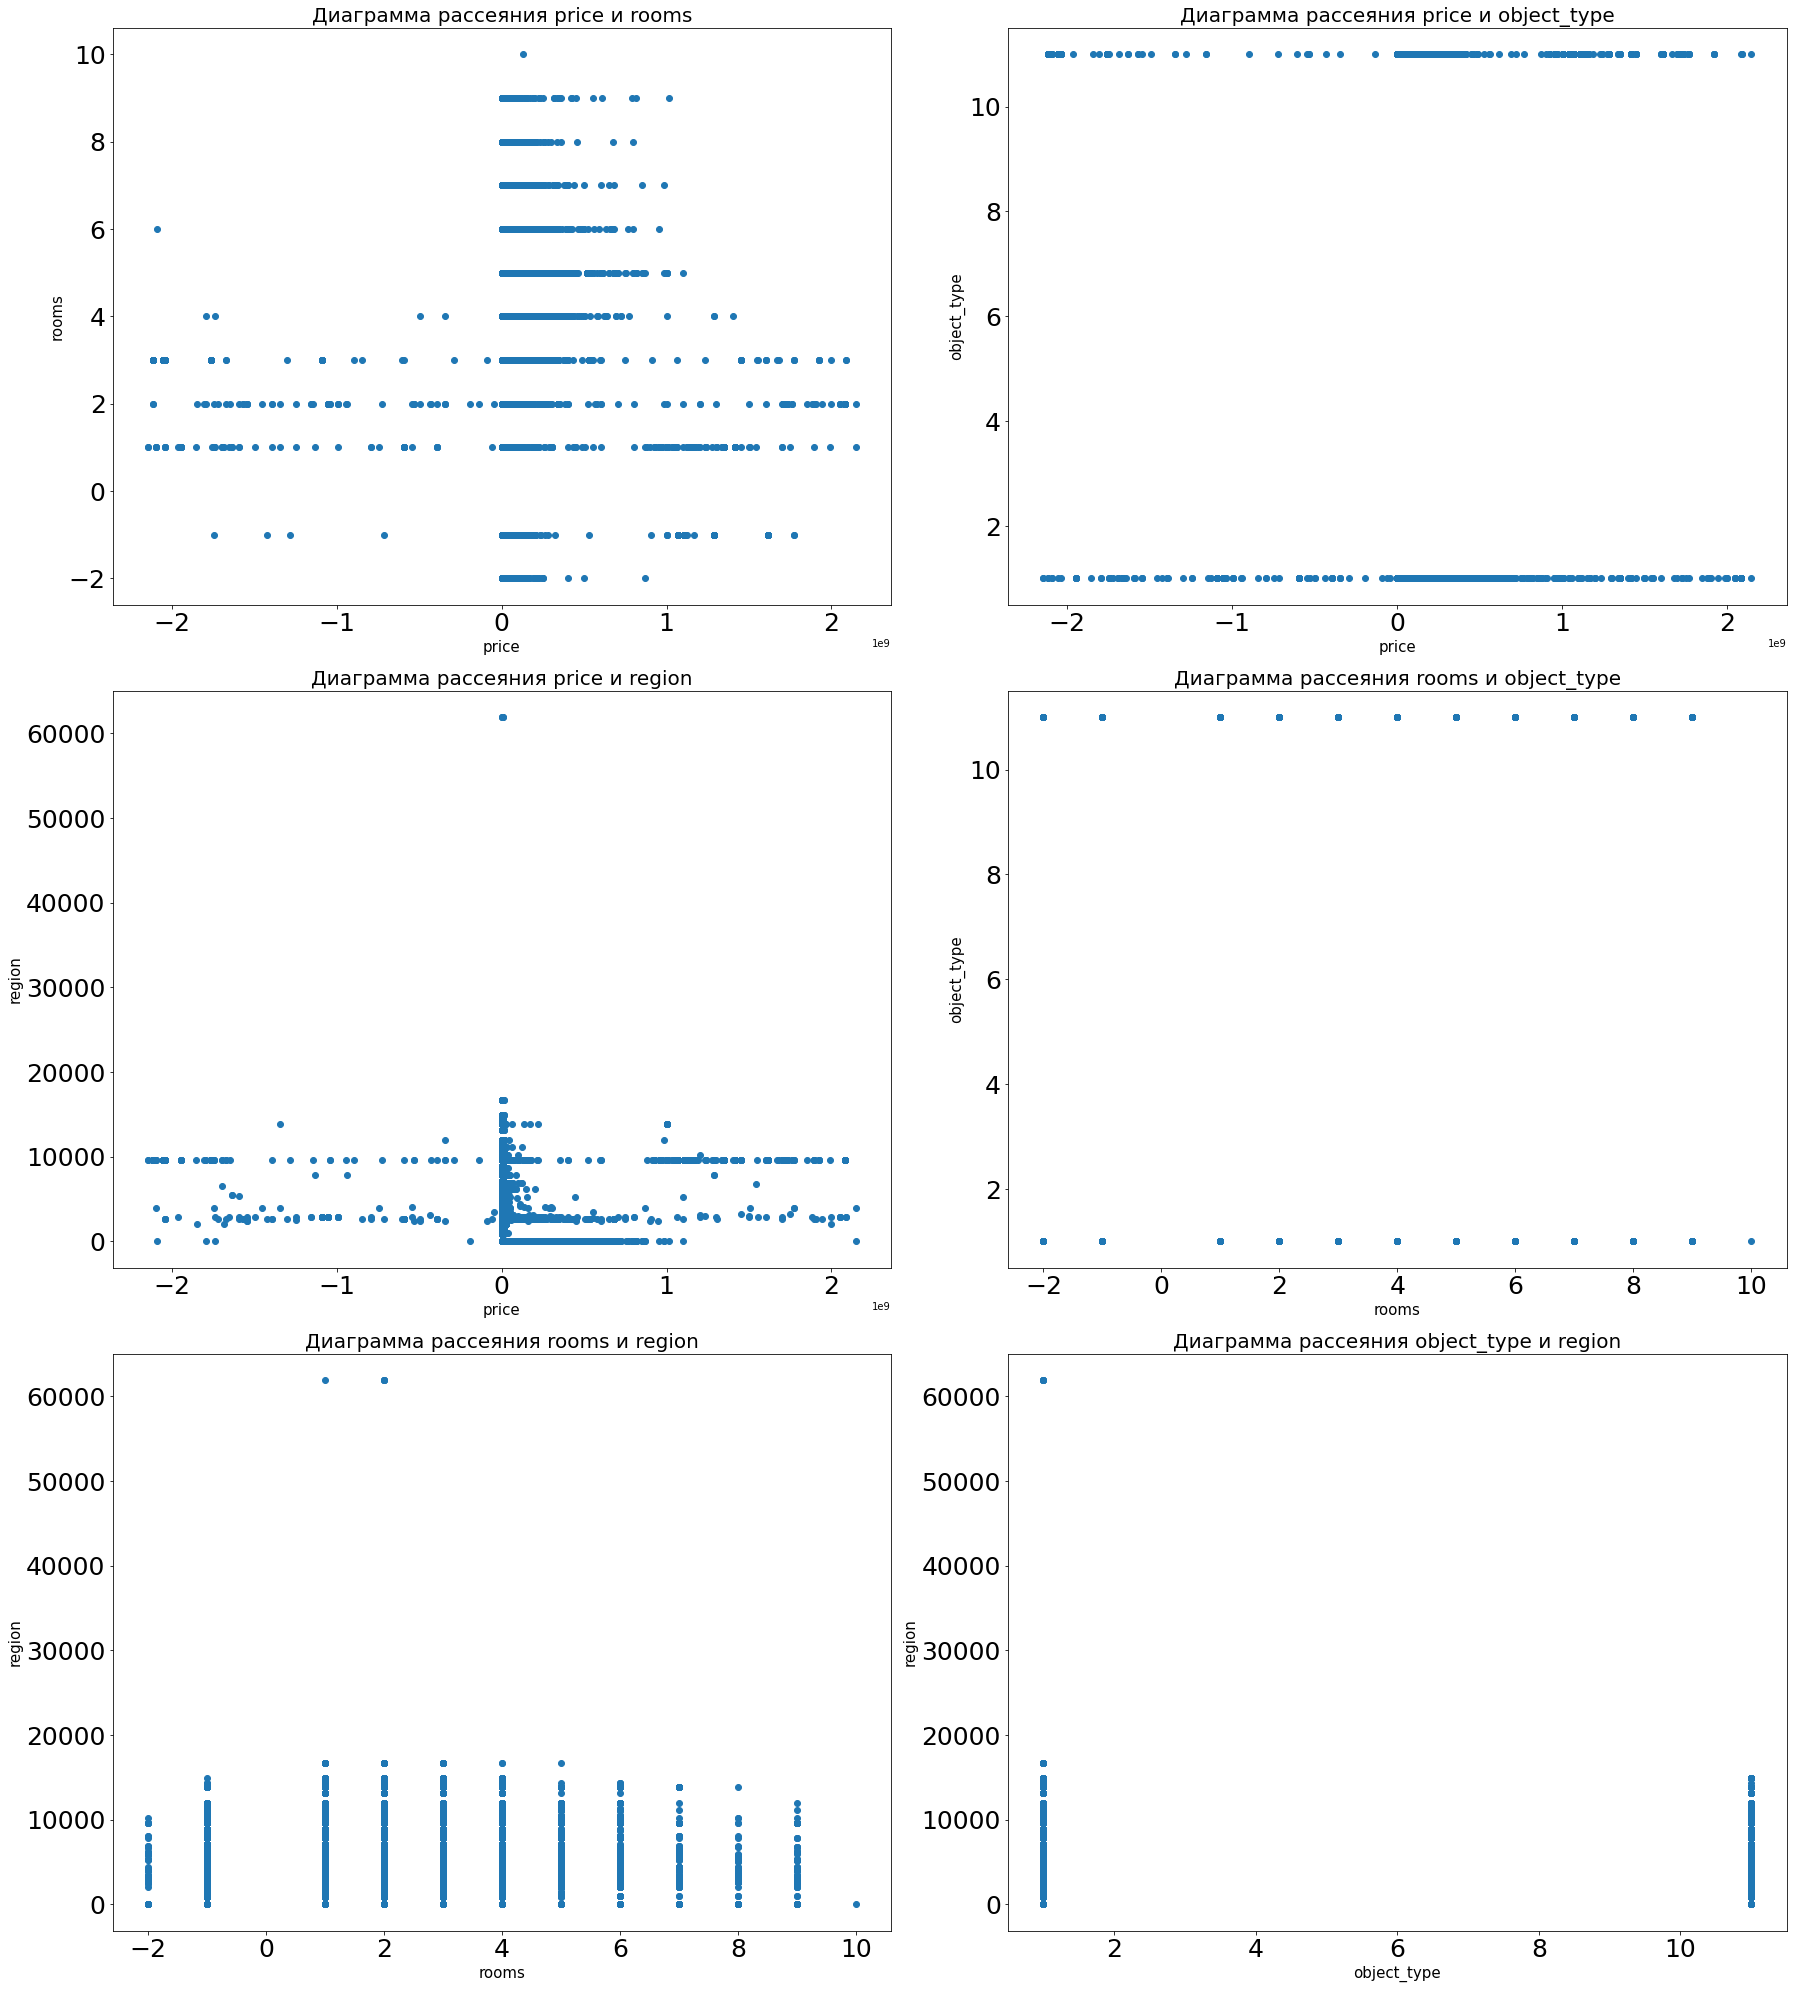

In [35]:
numeric_vars = ['price', 'rooms', 'object_type', 'region']
# создание пар из числовых переменных
pairs = list(itertools.combinations(numeric_vars, 2))
plt.subplots(figsize=(30, 35))
for i in range(6):
    name1, name2 = pairs[i]
    plt.subplot(3, 2, i + 1)
    plt.scatter(df[name1], df[name2])
    plt.tick_params(axis='both', which='major', labelsize=25)
    plt.title(f'Диаграмма рассеяния {name1} и {name2}', fontsize=20)
    plt.xlabel(name1, fontsize=15)
    plt.ylabel(name2, fontsize=15)
plt.subplots_adjust(wspace=0.15, hspace=0.15)
plt.show()

#### Этап 2 - поиск взаимосвязей путем визуализации ####
На данном этапе мы ищем ваимосвязи между переменными с помощью построения графиков

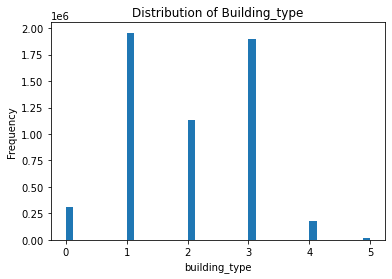

In [36]:
# Построение гистограммы распределения признака "price"
plt.hist(df['building_type'], bins=40)
plt.xlabel('building_type')
plt.ylabel('Frequency')
plt.title('Distribution of Building_type')
plt.show()

#### Вывод:
Судя по картинке выше, можно сделать вывод, что в целом разница между панельным жильем и кирпичными домами небольшая. Практически одинаковые показатели. Однако, монолитные здания не пользуются таким же широким спросом на рынке недвижимости. 


Посмотрим, зависят ли между собой object_type и price


In [ ]:
sns.pairplot(df[['rooms', 'area', 'kitchen_area', 'price']])
plt.show()

In [ ]:
# Создание столбчатой диаграммы для столбца building_type
sns.countplot(x='building_type', data=df)
plt.show()

In [ ]:
# Создание столбчатой диаграммы для столбца object_type
sns.countplot(x='object_type', data=df)
plt.show()

In [ ]:
# Создание столбчатой диаграммы для столбца region
plt.figure(figsize=(12, 6))
sns.countplot(x='region', data=df)
plt.xticks(rotation=90)
plt.show()

Далее мы можем посмотреть связь price с time, object_type, region, area

На данном этапе посмотрим как влияние региона на количество комнат в недвижимости. 

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='region', hue='rooms', multiple='stack')
plt.title('Distribution of Rooms by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='region', y='rooms')
plt.title('Influence of Region Deviation on Number of Rooms')
plt.xlabel('Region')
plt.ylabel('Rooms')
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='region', y='price')
plt.title('Influence of Region Deviation on price')
plt.xlabel('Region')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

Представим как оказывает уменьшение площади кухни на ценообразование. 

In [ ]:
# Создание нового признака с уменьшением площади кухни
df['kitchen_area_decrease'] = df['kitchen_area'].max() - df['kitchen_area']
X = df[['kitchen_area_decrease']]
y = df['price']
regressor = LinearRegression()
regressor.fit(X, y)
predicted_prices = regressor.predict(X)
plt.scatter(df['kitchen_area_decrease'], df['price'], color='blue', label='Наблюдения')
plt.plot(X, predicted_prices, color='red', linewidth=2, label='Линейная регрессия')
plt.title('Влияние уменьшения площади кухни на цену')
plt.xlabel('Уменьшение площади кухни')
plt.ylabel('Цена')
plt.legend()
plt.show()

Посмотрим в каком регионе чаще всего появляются объявления о продаже недвижимости за 2021 год


In [ ]:
df['date'] = pd.to_datetime(df['date'])
year_2021_ads = df[df['date'].dt.year == 2021]
region_counts = year_2021_ads['region'].value_counts()
most_common_region = region_counts.idxmax()
print("Регион с наибольшим количеством объявлений за 2021 год:", most_common_region)

In [ ]:
plt.figure(figsize=(12, 6))
region_counts.plot(kind='bar')
plt.title('Количество объявлений по регионам за 2021 год')
plt.xlabel('Регион')
plt.ylabel('Количество объявлений')
plt.xticks(rotation=90)
plt.show()

Выясним в каком регионе Российской Федерации была максимальная цена на недвижимость за весь период 

In [ ]:
region_prices = df.groupby('region')['price'].mean()
highest_price_region = region_prices.idxmax()
max_price = region_prices.max()
plt.figure(figsize=(12, 6))
region_prices.plot(kind='bar')
plt.title('Средняя цена в регионах')
plt.xlabel('Регион')
plt.ylabel('Средняя цена')
plt.xticks(rotation=45)
plt.annotate(f'Highest: {highest_price_region}', xy=(highest_price_region, region_prices[highest_price_region]),
             xytext=(highest_price_region, region_prices[highest_price_region] + 100000), ha='center',
             arrowprops=dict(arrowstyle='->'))
plt.tight_layout()
plt.show()
print(f"Максимальная цена: {max_price} в регионе {highest_price_region}")

Вглянем на наш датасет после EDA

In [ ]:
print(df.shape)
df.head()